## **Imports**

In [1]:
import numpy as np

# Matplotlib imports
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import MaxNLocator
import math 
import os

# Import the formatting_v3 code
from helpers.formatting_v3 import *

#from IPython.display import display, HTML
#%config InlineBackend.figure_format='retina'


plot_settings = {
    'fontsize': 14,
    'tick_width': 3,
    'tick_length': 8,
    'tick_pad': 6,
    'labelpad': 5,
    'title_fontsize': 16,
    'title_pad': 10,
    'line_color': 'royalblue',
    'face_color': '',
    'shading': 'nearest',
    'color_map': 'RdYlBu_r',
    'line_width': 2,
    'marker_size': 8,
    'x_locator': MaxNLocator(nbins=6),
    'y_locator': MaxNLocator(nbins=6, integer=True),
}

## **Load Data**

In [13]:
# Import data via the load experiment function
filename = 'data/2025-07-11/2025-07-11_Resonator_Power'
results = load_experiment_data(filename)

# Extract the results
meta  = results["metadata"]
step  = results["step"]
sweep = results["sweep"]
data  = results["data"]

# Get the sweep header and type
sw_header = results["sweep_headers"]
sw_type = sw_header[0].lower() if sw_header else 'unknown'

# Saving figure
save_path = create_save_path(filename, fig_type='jpg')

## **1D Plot**

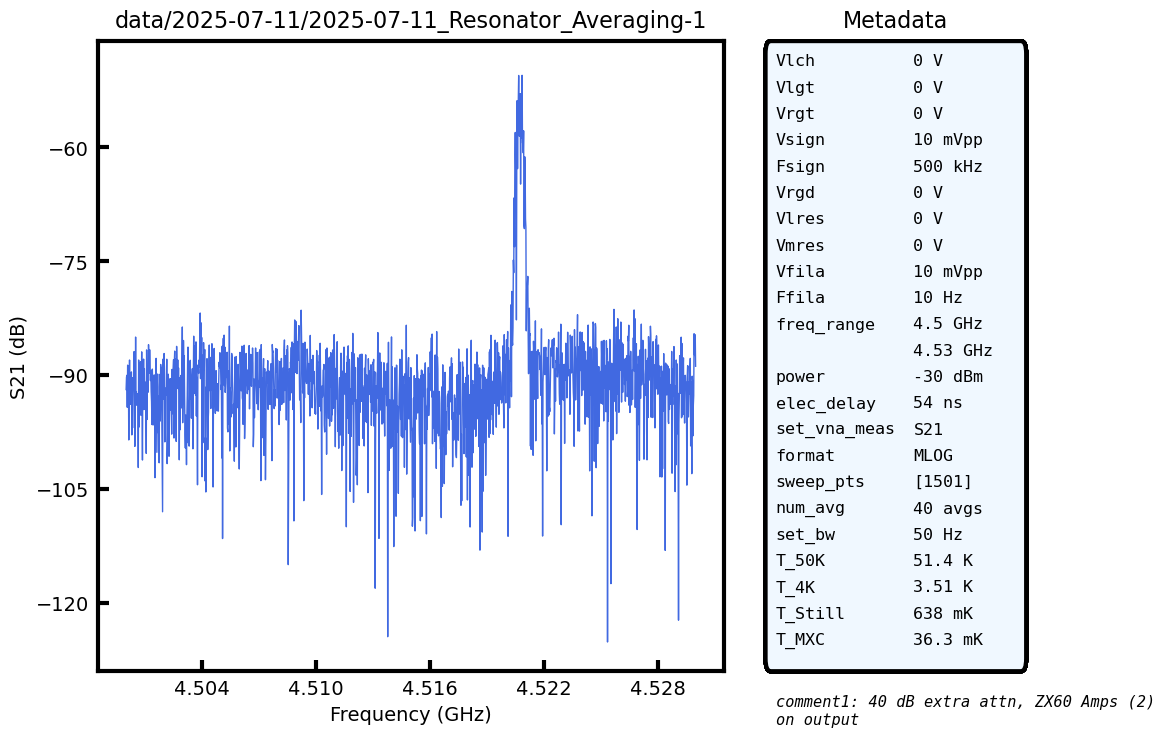

In [25]:
fig, ax_plot, ax_meta = format_plot()

# Plot Data
form_1d_plot(ax_plot, sweep, data, meta, filename=filename, sweep_type=sw_type,
             style=plot_settings)

# Metadata Table
meta_table(ax_meta, meta, comm_on=True)

# Add tight_layout to the figure
fig.tight_layout(pad=3.0)

# Save the figure
#fig.savefig(save_path, dpi=400, bbox_inches='tight')

## **2D Plot**

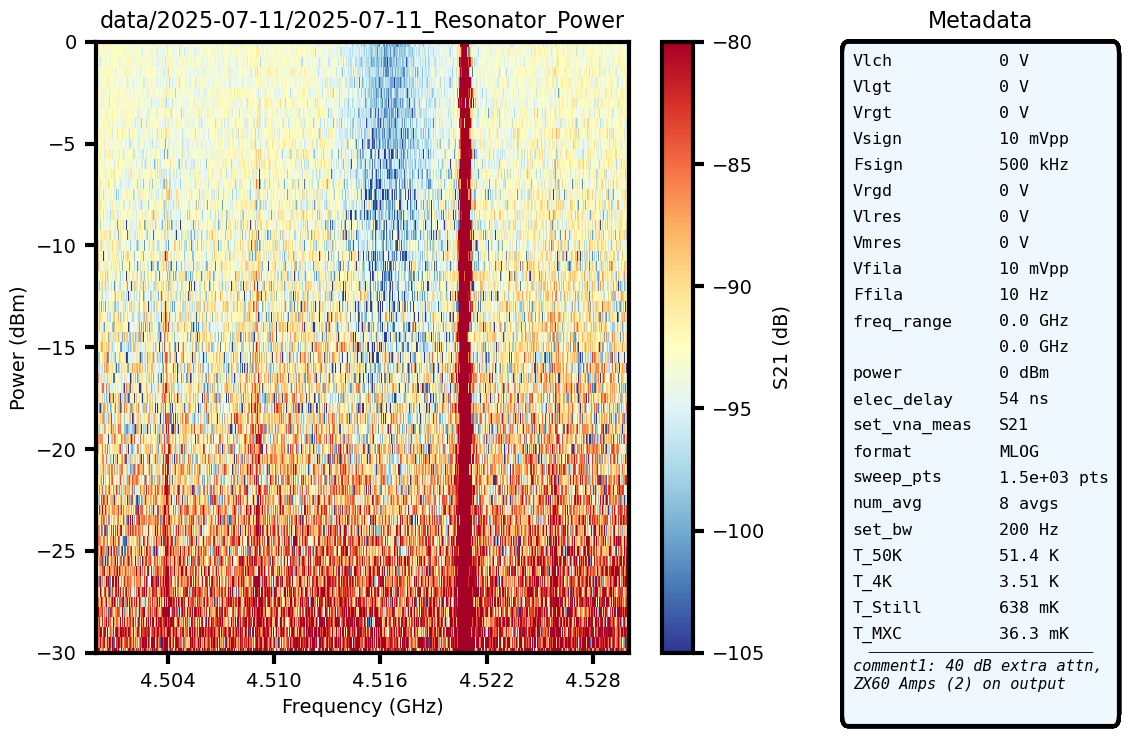

In [14]:
fig, ax_plot, ax_meta = format_plot()

# Plot Data
x, y, z = form_2d_plot(ax_plot, 
                       data, meta, 
                       filename=filename, 
                       vmin=-105,
                       vmax=-80,
                       sweep_type=sw_type, style=plot_settings)

# Metadata Table
meta_table(ax_meta, meta, comm_on=True)

# Add tight_layout to the figure
fig.tight_layout(pad=3.0)

# Save the figure
#fig.savefig(save_path, dpi=400, bbox_inches='tight')

The below code is used to get a line cut from the prior 2D plot.    

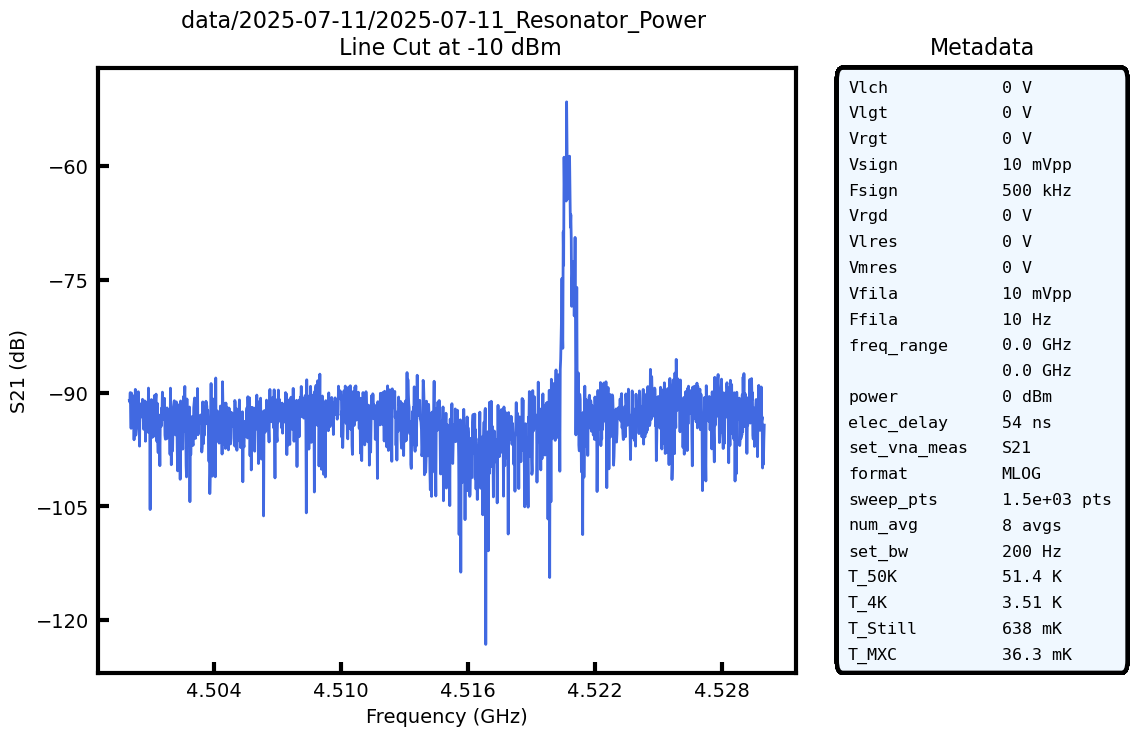

In [16]:
fig, ax_plot, ax_meta = format_plot()

# Get a linecut at a specific value
val = -10
unit = 'dBm'
axs = 'y'

# Plot the linecut
cut_x, cut_vals = get_linecut(x, y, z, axis=axs, value=val)
plot_linecut(ax_plot, cut_x, cut_vals, xlabel="Frequency (GHz)", ylabel="S21 (dB)", 
             filename=filename + f" \n Line Cut at {val} " + unit, style=plot_settings)

# Metadata Table
meta_table(ax_meta, meta, comm_on=False)

# Add tight_layout to the figure
fig.tight_layout(pad=3.0)

# Save the figure
#fig.savefig(save_path, dpi=400, bbox_inches='tight')

## **Multi-Set Plotting**

In [5]:
# Import data via the load experiment function
db_files = ['data/2025-07-12/2025-07-12_Amplifier_Testing_New_Wiring_0_Amps',
            'data/2025-07-12/2025-07-12_Amplifier_Testing_New_Wiring_2_Amps',
           ]

load_sets = [load_experiment_data(path) for path in db_files]

exp_sets = {}

for inx, loaded in enumerate(load_sets, start=1):
    exp_sets[f"Set_{inx}"] = {
        "metadata": loaded["metadata"],
        "step": loaded["step"],
        "sweep": loaded["sweep"],
        "data": loaded["data"],
        "sweep_headers": loaded["sweep_headers"],
        "step_headers": loaded["step_headers"]
    }

# Figure name and save path configuration --------------------------------------- #
first_path = db_files[0]
save_dir = os.path.dirname(first_path)
# Start with a base name
base_name = "MultiSet_Plot"
# Create a unique filename 
save_path = get_unique_filename(save_dir, base_name, extension='.jpg')


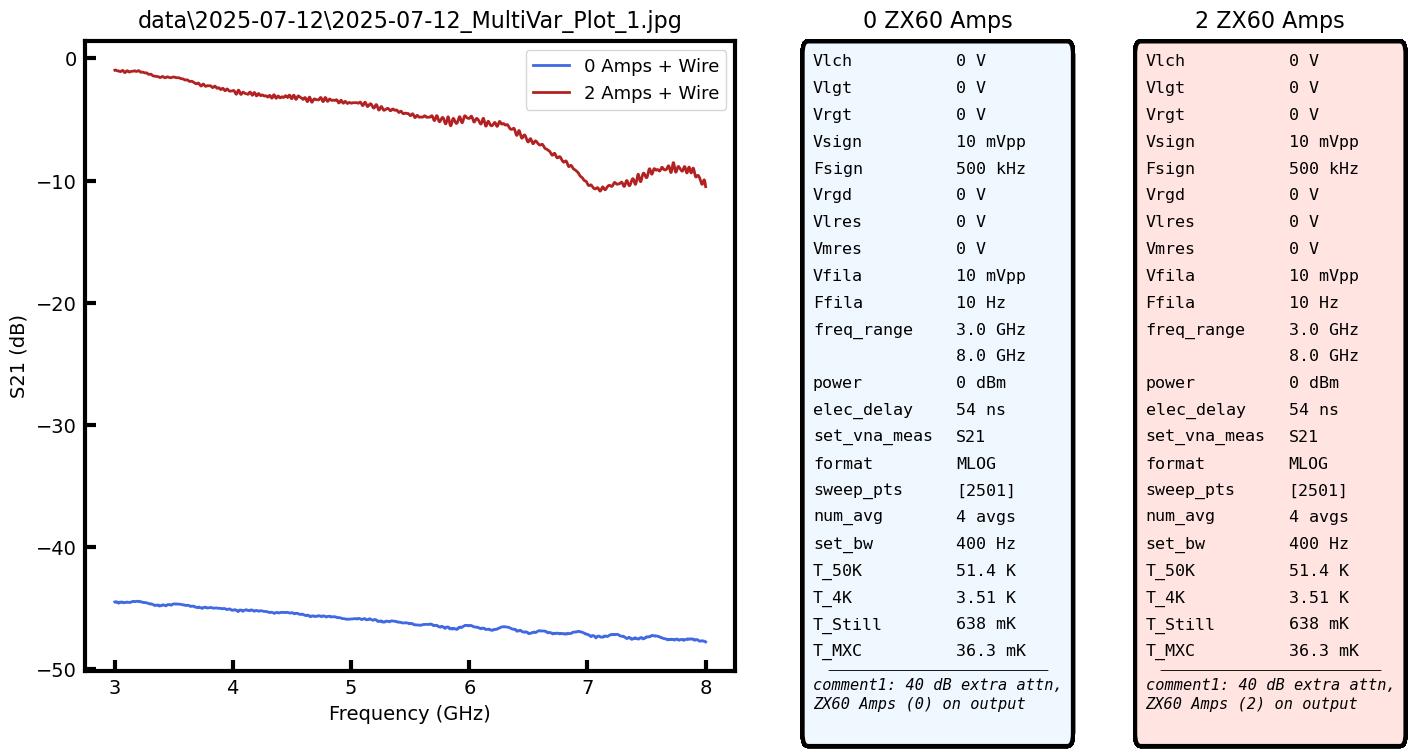

In [7]:
titles = ['0 ZX60 Amps', '2 ZX60 Amps']

plot_entries = [
    {"x": exp_sets['Set_1']['data'][:,5]*1e-9, 
     "y": exp_sets['Set_1']['data'][:,4], 
     "label": "0 Amps + Wire",
     "color": "royalblue", 
     "marks": "-"},
    {"x": exp_sets['Set_2']['data'][:,5]*1e-9, 
     "y": exp_sets['Set_2']['data'][:,4],
     "label": "2 Amps + Wire", 
     "color": "firebrick", 
     "marks": "-"},
]

fig, ax_plot, ax_meta_list = form_plot(num_meta=2) 

# Metadata Table
meta_table(ax_meta_list[0], exp_sets["Set_1"]["metadata"], 
           title=titles[0], facecolor="aliceblue", comm_on=True)
meta_table(ax_meta_list[1], exp_sets["Set_2"]["metadata"], 
           title=titles[1], facecolor="mistyrose", comm_on=True)

plot_exp_sets(
    ax_plot,
    plot_entries,
    xlabel="Frequency (GHz)",
    ylabel="S21 (dB)",
    filename=get_unique_filename(save_dir, base_name),
    log_y=True,
    ylims=(-100, -50),
    style=plot_settings
)


fig.subplots_adjust(bottom=0.3)
# Add tight_layout to the figure
fig.tight_layout(pad=3.0)


# Save the figure
fig.savefig(save_path, dpi=500, bbox_inches='tight')